# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [5]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [6]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [8]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""

# age_data_max = age_data['YEARS_BIRTH'].max()
# age_data_min = age_data['YEARS_BIRTH'].min()
bin_cut = np.linspace(20, 70, num = 11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 


# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

YEARS_BINNED
(35.0, 40.0]    42844
(40.0, 45.0]    41390
(30.0, 35.0]    39422
(45.0, 50.0]    35119
(50.0, 55.0]    34936
(55.0, 60.0]    33104
(25.0, 30.0]    32851
(60.0, 65.0]    27468
(20.0, 25.0]    12157
(65.0, 70.0]     8097
Name: count, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461.0,25.920548,"(25.0, 30.0]"
1,0,16765.0,45.931507,"(45.0, 50.0]"
2,0,19046.0,52.180822,"(50.0, 55.0]"
3,0,19005.0,52.068493,"(50.0, 55.0]"
4,0,19932.0,54.608219,"(50.0, 55.0]"


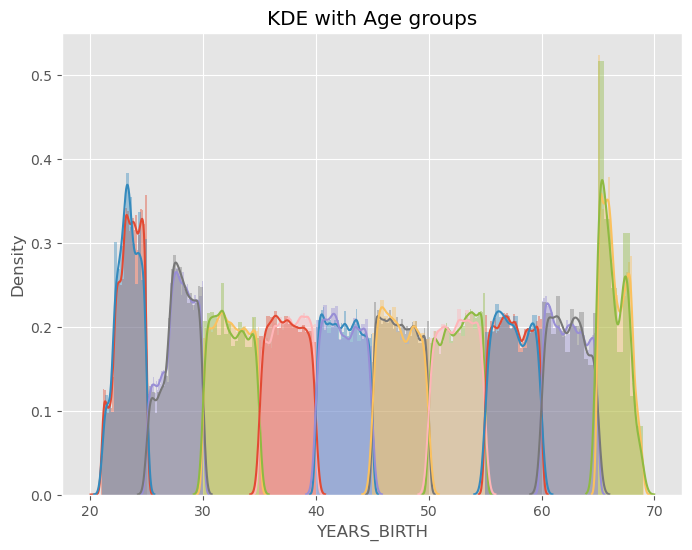

In [21]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
# 將 YEARS_BINNED 轉換為有序的 Categorical 類型
age_data['YEARS_BINNED'] = pd.Categorical(age_data['YEARS_BINNED'], ordered=True)

# 過濾掉 NaN 值
unique_bins = [interval for interval in age_data['YEARS_BINNED'].unique() if isinstance(interval, pd.Interval)]

# 繪圖前先排序 / 分組
year_group_sorted = sorted(unique_bins, key=lambda interval: interval.left)

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [23]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123057,8532.815662,23.377577
"(25.0, 30.0]",0.111382,10155.231348,27.822552
"(30.0, 35.0]",0.102785,11854.895033,32.479164
"(35.0, 40.0]",0.089441,13707.905331,37.555905
"(40.0, 45.0]",0.078497,15497.688790,42.459421
"(45.0, 50.0]",0.074176,17323.885105,47.462699
"(50.0, 55.0]",0.066980,19196.537383,52.593253
"(55.0, 60.0]",0.055311,20984.282292,57.491184
"(60.0, 65.0]",0.052752,22780.566259,62.412510


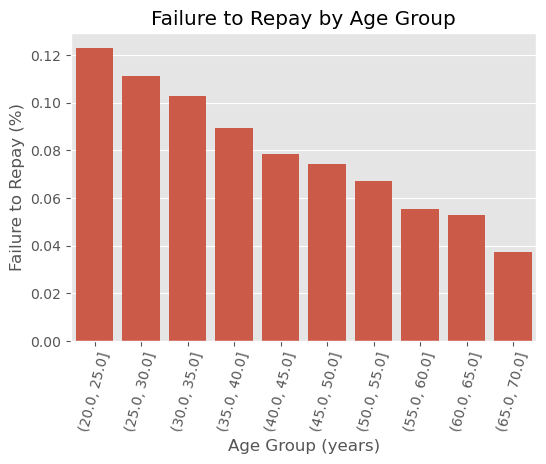

In [37]:
plt.figure(figsize = (6, 4))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""

# 計算每個年齡區間的還款失敗率
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups['YEARS_BINNED'] = age_groups.index  # 將 index 轉換為欄位

px = age_groups['YEARS_BINNED']
py = age_groups['TARGET']
sns.barplot(x=px, y=py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');